import necessory Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from keras.layers import Dense
from tensorflow import keras

Data collection and Analysis

In [ ]:
# Load the dataset
Dataset = pd.read_csv('Parkinson_Dataset.csv')

In [ ]:
# pinting first 5 rows of the dataset
Dataset.head()

,PatientID,Age,Gender,TremorScore,RigidityScore,BradykinesiaScore,PosturalInstabilityScore,Stage
0,1,68,Male,3.2,2.5,1.8,1.1,2
1,2,72,Female,2.8,2.3,1.6,1.2,2
2,3,61,Male,1.5,1.2,0.9,0.8,1
3,4,58,Female,4.5,3.8,2.2,1.5,3
4,5,76,Male,2.0,1.6,1.1,0.9,2


In [ ]:
# Converting Gender value to Numeric value

lable_encode = LabelEncoder()
lable = lable_encode.fit_transform(Dataset.Gender)
Dataset['Gender'] = lable
Dataset.head()

,PatientID,Age,Gender,TremorScore,RigidityScore,BradykinesiaScore,PosturalInstabilityScore,Stage
0,1,68,1,3.2,2.5,1.8,1.1,2
1,2,72,0,2.8,2.3,1.6,1.2,2
2,3,61,1,1.5,1.2,0.9,0.8,1
3,4,58,0,4.5,3.8,2.2,1.5,3
4,5,76,1,2.0,1.6,1.1,0.9,2


In [ ]:
# viwe shape of the dataset
Dataset.shape

(199, 8)

In [ ]:
# viwe more information about dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 199 non-null    int64  
 1   Age                       199 non-null    int64  
 2   Gender                    199 non-null    int64  
 3   TremorScore               199 non-null    float64
 4   RigidityScore             199 non-null    float64
 5   BradykinesiaScore         199 non-null    float64
 6   PosturalInstabilityScore  199 non-null    float64
 7   Stage                     199 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 12.6 KB


In [ ]:
# Viwe statical mesurement about the dataset
Dataset.describe()

,PatientID,Age,Gender,TremorScore,RigidityScore,BradykinesiaScore,PosturalInstabilityScore,Stage
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,102.025126,64.864322,0.517588,2.935678,2.493970,1.725628,1.261307,2.512563
std,58.788049,6.707954,0.500951,1.142911,1.009732,0.665299,0.414705,1.104899
min,1.000000,52.000000,0.000000,1.000000,0.800000,0.600000,0.500000,1.000000
25%,51.500000,59.500000,0.000000,2.000000,1.700000,1.200000,1.000000,2.000000
50%,103.000000,66.000000,1.000000,3.000000,2.500000,1.700000,1.200000,2.000000
75%,152.500000,70.000000,1.000000,3.900000,3.400000,2.300000,1.600000,3.000000
max,203.000000,77.000000,1.000000,5.500000,4.800000,3.200000,2.300000,5.000000


In [ ]:
# Viwe about output variable
Dataset["Stage"].value_counts()

2    61
3    54
1    42
4    36
5     6
Name: Stage, dtype: int64

In [ ]:
# Shift label values to start from 0
Dataset['Stage'] = np.array(Dataset['Stage']) - 1

In [ ]:
# Viwe about new output variable
Dataset["Stage"].value_counts()

1    61
2    54
0    42
3    36
4     6
Name: Stage, dtype: int64

In [ ]:
# gouping the data based on the target variable
Dataset.groupby("Stage").mean()

,PatientID,Age,Gender,TremorScore,RigidityScore,BradykinesiaScore,PosturalInstabilityScore
Stage,,,,,,,
0,109.761905,59.523810,0.404762,1.490476,1.247619,0.897619,0.757143
1,90.901639,64.950820,0.688525,2.332787,1.929508,1.362295,1.040984
2,98.444444,66.500000,0.611111,3.500000,2.987037,2.046296,1.427778
3,119.527778,67.750000,0.222222,4.458333,3.858333,2.622222,1.841667
4,88.166667,69.333333,0.500000,4.966667,4.333333,2.950000,2.050000


In [ ]:
# Ploting data for vizualization
#sns.pairplot(Dataset,hue="Stage")

Data Pre-processing

In [ ]:
#seperating features and targets
x = Dataset.drop(columns=['PatientID','Stage'], axis = 1)
y = Dataset['Stage']

In [ ]:
print(y)

0      1
1      1
2      0
3      2
4      1
      ..
194    3
195    2
196    1
197    0
198    3
Name: Stage, Length: 199, dtype: int64


Seperating data to train and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(199, 6) (159, 6) (40, 6)


In [ ]:
print(x_train)

     Age  Gender  TremorScore  RigidityScore  BradykinesiaScore  \
80    61       1          1.3            1.1                0.8   
179   55       0          1.1            0.9                0.7   
121   68       0          1.8            1.5                1.0   
105   55       1          1.1            0.9                0.7   
45    69       0          3.8            3.2                2.2   
..   ...     ...          ...            ...                ...   
104   74       0          2.3            1.9                1.4   
129   53       0          1.3            1.1                0.8   
183   70       1          3.3            2.8                1.9   
174   70       0          4.2            3.6                2.5   
122   57       0          4.3            3.7                2.6   

     PosturalInstabilityScore  
80                        0.7  
179                       0.6  
121                       0.9  
105                       0.6  
45                        1.5  
.. 

Data Standarization

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
# Create an instance of the SMOTE class and apply it to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

Model Building & Training

In [ ]:
model = Sequential()
model.add(Dense(112, activation= 'relu', input_dim =6))
model.add(Dense(48, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
8/8 [==============================] - 1s 30ms/step - loss: 1.6410 - accuracy: 0.2511 - val_loss: 1.4524 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 1.4009 - accuracy: 0.4979 - val_loss: 1.3579 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 1.2522 - accuracy: 0.6085 - val_loss: 1.2733 - val_accuracy: 0.5000
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 1.1229 - accuracy: 0.6426 - val_loss: 1.1865 - val_accuracy: 0.5250
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 1.0091 - accuracy: 0.6511 - val_loss: 1.0915 - val_accuracy: 0.5000
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.9167 - accuracy: 0.7191 - val_loss: 1.0077 - val_accuracy: 0.5750
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8398 - accuracy: 0.7574 - val_loss: 0.9530 - val_accuracy: 0.6000
Epoch 8/50
8/8 [=================

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 7ms/step - loss: 0.3344 - accuracy: 0.9500
Test loss: 0.3344, Test accuracy: 0.9500


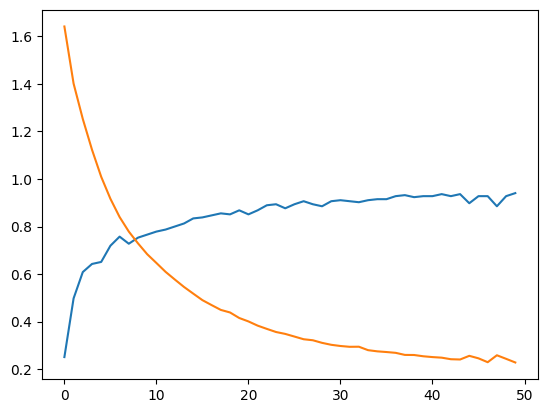

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(accuracy))

plt.plot(epochs,accuracy)
plt.plot(epochs, loss)
plt.show()

Save the model

In [ ]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
model.save('Parkinsons_Trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
# You have also used x_train, y_train, x_test, and y_test for training and testing data

# Predict probabilities for the test data
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate the classification report
target_names = ['Stage 01', 'Stage 02', 'Stage 03', 'Stage 04', 'Stage 05']
report = classification_report(y_test, y_pred, target_names=target_names)

print(report)

2/2 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

    Stage 01       1.00      1.00      1.00         6
    Stage 02       1.00      0.93      0.96        14
    Stage 03       0.91      1.00      0.95        10
    Stage 04       0.89      1.00      0.94         8
    Stage 05       1.00      0.50      0.67         2

    accuracy                           0.95        40
   macro avg       0.96      0.89      0.90        40
weighted avg       0.96      0.95      0.95        40



Prediction system

In [ ]:
new_data =(69	,1,	2.9,	2.4	,1.8,	1.3)

model = load_model('Parkinsons_Trained_model.h5')

new_data_as_np = np.asarray(new_data)

data_reshaped = new_data_as_np.reshape(1,-1)

std_data = scaler.transform(data_reshaped)

prediction = model.predict(std_data)

# Convert probabilities to class labels
predicted_classes = [np.argmax(prediction) + 1 for prediction in prediction]

# Print the predicted class
print("Predicted Class:", predicted_classes)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 19ms/step
Predicted Class: [2]
